In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [12]:
X_test.shape

(10000, 32, 32, 3)

In [13]:
y_train.shape

(50000, 1)

In [14]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [11]:
y_test = y_test.reshape(-1,)

In [12]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

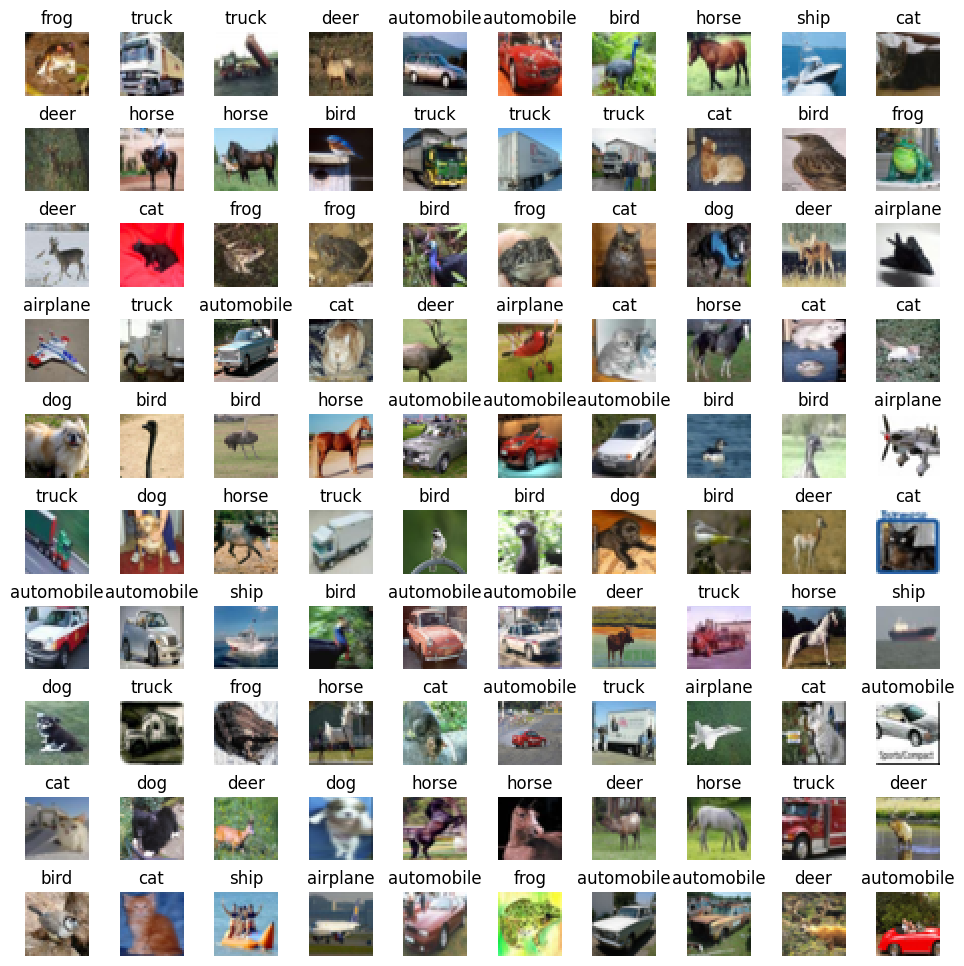

In [13]:
n_rows = 10
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], interpolation="nearest")
        plt.axis('off')
        plt.title(classes[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [4]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

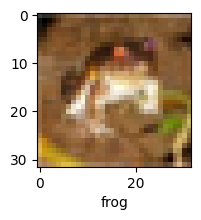

In [14]:
plot_sample(X_train, y_train, 0)

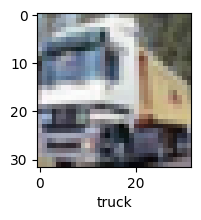

In [23]:
plot_sample(X_train, y_train, 1)

In [24]:
X_train = X_train / 255
X_test = X_test / 255

Build simple artificial neural network for image classification

In [25]:
ann=models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

c:\Users\RADHA\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 34ms/step - accuracy: 0.3016 - loss: 1.9332
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.4176 - loss: 1.6508
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.4569 - loss: 1.5485
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 32ms/step - accuracy: 0.4748 - loss: 1.4902
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.4955 - loss: 1.4312


In [26]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.53      0.57      0.55      1000
           1       0.44      0.76      0.56      1000
           2       0.36      0.42      0.38      1000
           3       0.39      0.25      0.31      1000
           4       0.52      0.27      0.36      1000
           5       0.55      0.23      0.33      1000
           6       0.48      0.59      0.53      1000
           7       0.66      0.43      0.52      1000
           8       0.61      0.54      0.57      1000
           9       0.39      0.67      0.49      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.46     10000
weighted avg       0.49      0.47      0.46     10000



Now let us build a convolutional neural network to train our images

In [27]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

c:\Users\RADHA\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.3746 - loss: 1.7052
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.5960 - loss: 1.1593
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6578 - loss: 0.9907
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.6837 - loss: 0.9108
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7138 - loss: 0.8334
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7325 - loss: 0.7703
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7515 - loss: 0.7263
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7658 - loss: 0.6823
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7800 - loss: 0.6375
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7903 - loss: 0.6004
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8037 - loss: 0.5656
Epoch 12

In [29]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6904 - loss: 1.2019


[1.204277753829956, 0.6873999834060669]

In [30]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([[3.5895911e-04, 1.3017383e-05, 2.0779613e-05, 9.6554184e-01,
        1.9156232e-06, 3.2855617e-03, 8.0775426e-05, 1.0010693e-08,
        3.0696664e-02, 4.8534145e-07],
       [1.7121869e-07, 2.2426942e-08, 2.9561162e-10, 9.5297756e-11,
        3.7550941e-13, 8.8630192e-17, 9.8736176e-17, 2.8524592e-19,
        9.9999988e-01, 4.6435059e-10],
       [7.3660142e-03, 8.2028121e-01, 4.9012902e-05, 8.9600793e-04,
        2.2041759e-05, 1.4712974e-05, 2.4269488e-05, 6.5296149e-06,
        1.7116781e-01, 1.7252211e-04],
       [8.1692034e-01, 6.9028297e-03, 3.3024956e-02, 9.9470355e-03,
        5.1813211e-02, 2.9909897e-06, 4.2131155e-06, 6.1658934e-06,
        8.0833957e-02, 5.4427504e-04],
       [8.3613145e-07, 2.3208313e-06, 1.1317734e-04, 2.3870652e-03,
        6.5342498e-01, 1.4134547e-03, 3.4265780e-01, 3.8896903e-08,
        1.5450924e-07, 1.4755105e-07]], dtype=float32)

In [31]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 4]

In [32]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

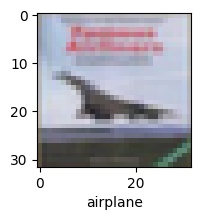

In [33]:
plot_sample(X_test, y_test,3)

In [34]:
classes[y_classes[3]]

'airplane'

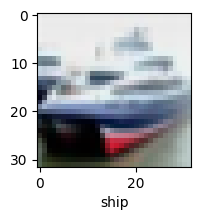

In [35]:
plot_sample(X_test, y_test,1)

In [36]:
classes[y_classes[1]]

'ship'

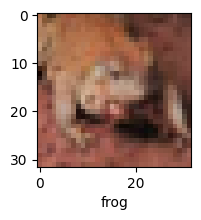

In [37]:
plot_sample(X_test, y_test,5)

In [38]:
classes[y_classes[5]]

'frog'

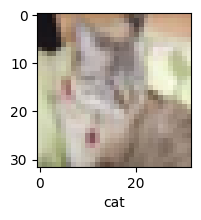

In [39]:
plot_sample(X_test, y_test,8)

In [40]:
classes[y_classes[8]]

'cat'